In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sympy import *
init_printing()
import sys
sys.path.append('../')
import uPVT.PVT_correlations as PVT

## Газосодержание
<a id="Rs"></a>

### Газосодержание, корреляция Стендинга
<a id="Rs_Standing"></a>

Для расчета газосодержания используется корреляция, обратная корреляции Стендинга для давления насыщения нефти газом. 

$$ R_s =  \gamma_g  \left( \frac{1.92 p}{\ 10^{y_g}}\right)^{1.204} $$

где:

$R_s$ - газосодержание, $м^3/м^3 $

$P$ - давление, $МПа$ 

$\gamma_g$ - относительная плотность газа, безразмерная величина  

$y_g$ - мольная доля газа, $ y_g = 1.225 +0.00164 T - \frac{ 1.769}{\gamma_o}$

$\gamma_o$ - относительная плотность нефти, безразмерная величина  

$ T $ - температура, $ ^{\circ}\mathrm{K}$

Газосодержание является одним из ключевых свойств нефти при расчётах производительности скважин и работы скважинного оборудования. Динамика изменения газосодержания во многом определяет количество свободного газа в потоке и должна учитываться при проведении расчётов.

Если известно газосодержание при давлении насыщения, то газосодержание при давлениях ниже давления насыщения может быть получено из пропорции:

$$ R_s =  \ R_{sb}\left( \frac{p}{\ P_b}\right)^{1.204} $$

где:

$R_s$ - газосодержание, $м^3/м^3 $

$P$ - давление, $МПа$ 

$P_b$ - давление насыщения, $МПа$

$R_{sb}$ - газосодержание при давлении насыщения, $м^3/м^3 $

Корреляции Standing базируются на 105 экспериментально определенных давлениях насыщения нефтяных систем Калифорнии. Диапазоны значений основных свойств, использованных для разработки данной корреляции, приведены в таблице ниже. 

| <p align="left"> Параметр  | Диапазон |
| :--- | :--- |
| <p align="left"> давление насыщения,$P_b$ , $ МПа $  | 0.896…48.263  |
| <p align="left"> температура, $^{\circ}\mathrm{K} $ | 310…400 |
| <p align="left"> газосодержание при давлении насыщения, $R_{sb}$ , $м^3/м^3 $ | 3.6…254 |
| <p align="left"> относительная плотность нефти по воде, $\gamma_o$ | 0.725…0.956  |
| <p align="left"> относительная плотность газа, $\gamma_g$  | 0.59…0.95  |


ref "A Pressure-Volume-Temperature Correlation for Mixtures of California Oil and Gases", M.B. Standing, Drill. & Prod. Prac., API, 1947.

In [2]:
# Корреляция Стендинга для газосодержания реализована 
# в виде функции unf_Rs_Standing_m3m3 в модуле PVT_correlations. 
# Подробные данные по функции включая исходный код приведены ниже

PVT.unf_rs_Standing_m3m3??

In [3]:
# параметры определяющие диапазоны значений для построения графиков
p_set=np.arange(1,300,10)
t_set=np.arange(273,380,30)
t_set_def=np.array([313])
gg_set=np.arange(0.6,1,0.1)
gg_set_def=np.array([0.8])
go_set=np.arange(0.8,1,0.05)
go_set_def=np.array([0.86])
# функция для автоматизации построения графиков по давлению насыщения
def prep_plot(func,tset,goset,ggset,plot_title,plot_xlab,plot_ylab):
    for t in tset:
        for gg in ggset:
            for go in goset:
                Rs_set=[]
                for p in p_set:
                    Rs_set.append(func(p,t_K = t,gamma_gas = gg,gamma_oil = go))
                plt.plot(p_set, Rs_set, label='t = %1.0f $ ^{\circ}\mathrm{K}$'%t +
                                                 ' $\gamma_g$ = %1.2f'%gg + 
                                                 ' $\gamma_o$ = %1.2f'%go)
    plt.title(plot_title)
    plt.ylabel(plot_ylab, color = 'black')
    plt.xlabel(plot_xlab, color = 'black')
    plt.legend()

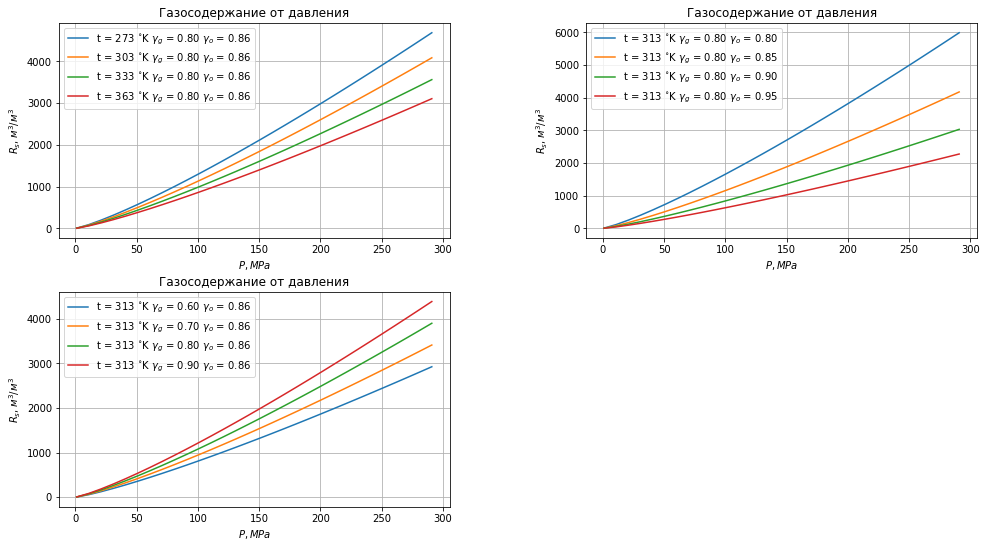

In [4]:
# код для построения графиков
plt.figure(figsize=(15,8))
f = PVT.unf_rs_Standing_m3m3
# рисуем первый график
plt.subplot(221)
prep_plot(f,t_set,go_set_def,gg_set_def,
              'Газосодержание от давления',
               '$P, MPa$',
               '$R_s, м^3/м^3$')
plt.grid()
# рисуем второй график
plt.subplot(222)
prep_plot(f,t_set_def,go_set,gg_set_def,
              'Газосодержание от давления',
               '$P, MPa$',
               '$R_s, м^3/м^3$')
plt.grid()
# рисуем третий график
plt.subplot(223)
prep_plot(f,t_set_def,go_set_def,gg_set,
              'Газосодержание от давления',
               '$P, MPa$',
               '$R_s, м^3/м^3$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
# рисуем все
plt.grid()
plt.show()

### Газосодержание, корреляция Веларде-Маккейна
<a id="Rs_McCain"></a>
Корреляция Веларде-Маккейна (1999) для газосодержания базируется на 718 лабораторных исследованиях разгазирования различных нефтей со всего мира.

$$ R_s = R_{sb}R_{sr}   $$

где:

$R_s$ - газосодержание, $м^3/м^3$

$R_{sb}$ - газосодержание при давлении насыщения, $м^3/м^3$




$R_{sr}=a_1p_r^{a_2} + (1-a_1)p_r^{a_3}$ - приведенное газосодержание

$p_r=\frac{(p-14,7)}{(p_b-14,7)}$ - степень превышения давления, $psig/psig$

$a_1=9.73 \cdot 10^{-7}\gamma_{gSP}^{1.672608}API^{0.929870}T^{0.247235}(p_b-14.7)^{1.056052}$

$a_2=0.022339 \gamma_{gSP}^{-1.004750}API^{0.337711}T^{0.132795}(p_b-14.7)^{0.302065}$

$a_3=0.725167 \gamma_{gSP}^{-1.485480}API^{-0.164741}T^{-0.091330}(p_b-14.7)^{0.047094}$

В приведенной таблице представлены диапазоны значений использованных для создания корреляции:

| <p align="left"> Параметр  | Мин|Среднее|Макс|
| :--- | :---: |:---:|:---:|
| <p align="left"> давление насыщения,$P_b$ , $ МПа $  | 2.861  |15.706|53.434|
| <p align="left"> температура, $^{\circ}\mathrm{С} $ | 21 |86|160|
| <p align="left"> относительная плотность газа на сепараторе, $\gamma_g$  | 0.555  |0.793|1.472|
| <p align="left"> объемный коэффициент нефти при давлении насыщения, $B_{ob}$ , $ м^3/м^3 $ | 1.012  |1.358|2.042|


In [7]:
# Корреляция Веларде для газосодержания реализована 
# в виде функции unf_Rs_Velarde_m3m3 в модуле PVT_correlations. 
# Подробные данные по функции включая исходный код приведены ниже

PVT.unf_rs_Velarde_m3m3??

In [8]:
# параметры определяющие диапазоны значений для построения графиков
p_set=np.arange(1,11,0.25)
t_set=np.arange(294,400,30)
t_set_def=np.array([313])
gg_set=np.arange(0.6,1,0.1)
gg_set_def=np.array([0.8])
go_set=np.arange(0.8,1,0.05)
go_set_def=np.array([0.86])
# функция для автоматизации построения графиков по давлению насыщения
def prep_plot(func,tset,goset,ggset,plot_title,plot_xlab,plot_ylab):
    for t in tset:
        for gg in ggset:
            for go in goset:
                Rs_set=[]
                for p in p_set:
                    Rs_set.append(func(p,t_K = t,gamma_gas = gg,gamma_oil = go))
                plt.plot(p_set, Rs_set, label='t = %1.0f $ ^{\circ}\mathrm{K}$'%t +
                                                 ' $\gamma_g$ = %1.2f'%gg + 
                                                 ' $\gamma_o$ = %1.2f'%go)
    plt.title(plot_title)
    plt.ylabel(plot_ylab, color = 'black')
    plt.xlabel(plot_xlab, color = 'black')
    plt.legend()

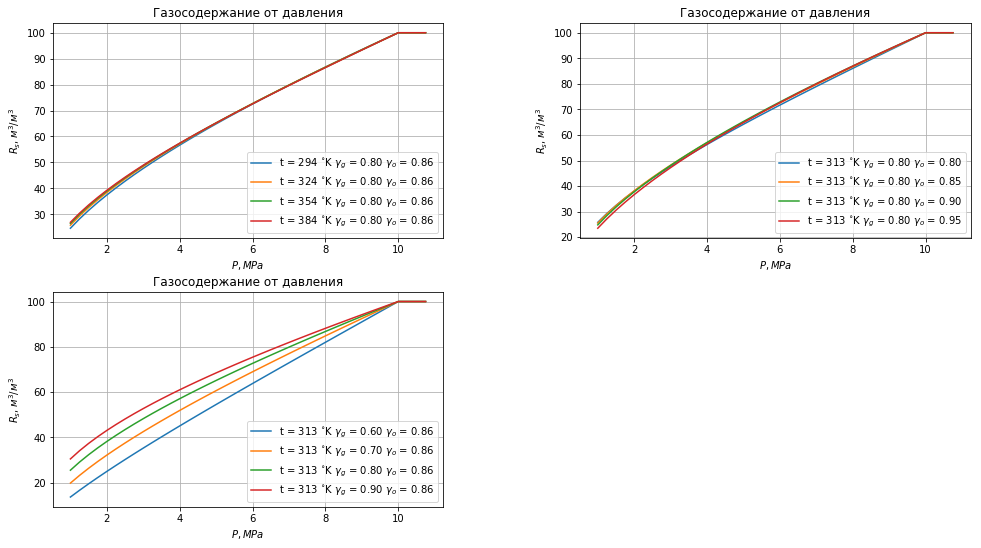

In [9]:
# код для построения графиков
plt.figure(figsize=(15,8))
f = PVT.unf_rs_Velarde_m3m3
# рисуем первый график
plt.subplot(221)
plt.grid()
prep_plot(f,t_set,go_set_def,gg_set_def,
              'Газосодержание от давления',
               '$P, MPa$',
               '$R_s, м^3/м^3$')
# рисуем второй график
plt.subplot(222)
plt.grid()
prep_plot(f,t_set_def,go_set,gg_set_def,
              'Газосодержание от давления',
               '$P, MPa$',
               '$R_s, м^3/м^3$')
# рисуем третий график
plt.subplot(223)
prep_plot(f,t_set_def,go_set_def,gg_set,
              'Газосодержание от давления',
               '$P, MPa$',
               '$R_s, м^3/м^3$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
# рисуем все
plt.grid()
plt.show()

###  Газосодержание при давлении насыщения, Корреляция Маккейна если известны данные в сепараторе и резервуаре
<a id="Rsb_McCain"></a>
Во многих корреляциях используется в качестве исходного параметра - газосодержание при давлении насыщения. Значение этого параметра может быть получено с помощью полевых данных как сумма отделяемого газового фактора в сепараторе и резервуаре для товарной нефти.


$$ R_{sb} = R_{sp} + R_{st}   $$

где:

$R_{sb}$ - газосодержание при давлении насыщения, $м^3/м^3$

$R_{sp}$ - газовый фактор, отделяемый в сепараторе, $м^3/м^3$

$R_{st}$ -  газовый фактор в резервуаре для товарной нефти, $м^3/м^3$

Данное уравнение справедливо только если пластовое давление выше давления насыщения

---
<img  src="pics/McCain_Rsb with stock tank and separator.jpg" width="600"  >

Расход газа и дебит нефти в сепараторе обычно измеряются, когда как в резервуаре газ обычно выпускается и не замеряется. Поэтому для более точной оценки газосодержания пластовой нефти при давлении насыщения необходимо оценить газовый фактор в резервуаре.
Таким образом, был разработана формула на основе GRACE-алгоритма на базе 898 исследований пластового флюида. В таблице приведены набор данных для исследования.

<img  src="pics/McCain_Rsb with stock tank and separator_data.jpg" width="600"  >

$$ ln R_{st} = 3.955 + 0.83z - 0.024z^2 + 0.075z^3 $$

$$ z =\sum_{n=1}^3 z_n $$

$$ z_n = C0_n + C1_nVAR_n + C2_nVAR_n^2 $$

| <p align="left"> $$n$$  | $$VAR$$|$$CO$$|$$C1$$|$$C2$$|
| :--- | :---: |:---:|:---:|:---:|
| <p align="left"> $$1$$  | $$ln p_{sp} $$ |$$-8.005$$|$$2.7$$|$$-0.161$$|
| <p align="left"> $$2$$  | $$ln T_{sp}$$  |$$1.224$$|$$-0.5$$|$$0$$|
| <p align="left"> $$3$$ | $$API$$  |$$-1.587$$|$$0.0441$$|$$-2.29 \cdot  10 ^{-5}$$|
    
$$T_{sp} - °F, p_{sp} - psia $$

Выражение для вычисления газового фактора в резервуаре требует знать температуру и давление в сепараторе, которые обычно не всегда бывают известны. Поэтому в этом случае можно использовать следующее уравнение.

$$ R_{sb} = 1.1618 R_{sp}   $$

In [11]:
# Корреляция Маккейна для газосодержания при давлении насыщения реализована 
# в виде функции unf_Rsb_Mccain_m3m3 в модуле PVT_correlations. 
# Подробные данные по функции включая исходный код приведены ниже

PVT.unf_rsb_Mccain_m3m3??

In [17]:
# параметры определяющие диапазоны значений для построения графиков
p_set=np.arange(1,11,0.25)
t_set=np.arange(294,400,30)
t_set_def=np.array([313])
go_set=np.arange(0.8,1,0.05)
go_set_def=np.array([0.86])
r_sp = 50
# функция для автоматизации построения графиков по давлению насыщения
def prep_plot(func,tset,goset,plot_title,plot_xlab,plot_ylab):
    for t in tset:
            for go in goset:
                Rs_set=[]
                for p in p_set:
                    Rs_set.append(func(r_sp,go,p,t))
                plt.plot(p_set, Rs_set, label='t = %1.0f $ ^{\circ}\mathrm{K}$'%t +
                                                  ' $\gamma_o$ = %1.2f'%go)
    plt.title(plot_title)
    plt.ylabel(plot_ylab, color = 'black')
    plt.xlabel(plot_xlab, color = 'black')
    plt.legend()

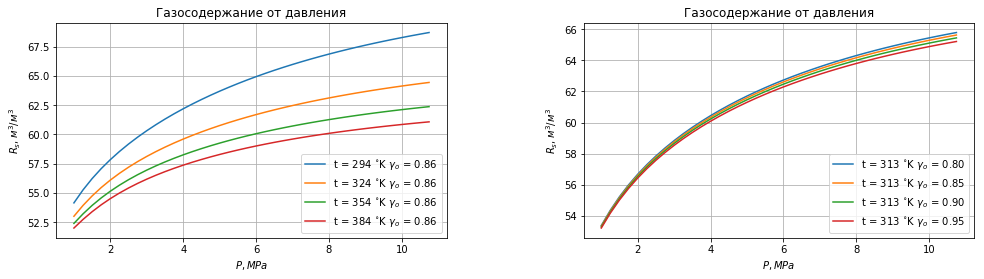

In [20]:
# код для построения графиков
plt.figure(figsize=(15,8))
f = PVT.unf_rsb_Mccain_m3m3
# рисуем первый график
plt.subplot(221)
plt.grid()
prep_plot(f,t_set,go_set_def,
              'Газосодержание от давления',
               '$P, MPa$',
               '$R_s, м^3/м^3$')
# рисуем второй график
plt.subplot(222)
plt.grid()
prep_plot(f,t_set_def,go_set,
              'Газосодержание от давления',
               '$P, MPa$',
               '$R_s, м^3/м^3$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
# рисуем все
plt.show()